<a href="https://colab.research.google.com/github/nickhward/ML_Trading_methods/blob/main/full_macd_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Extensive Exploratory Data Analysis of MACD Bot Data

This notebook is dedicated to an in-depth and comprehensive exploratory data analysis (EDA) of the Moving Average Convergence Divergence (MACD) Bot Data. 

## Objective

Our objective is to derive meaningful insights from the dataset and establish a solid understanding of the underlying patterns and relationships that exist within the data. EDA is a critical step in the data science process as it aids in refining hypotheses, identifying outliers, considering assumptions, and selecting appropriate models for subsequent analysis.

I will delve into various aspects of the dataset, analyzing both single-variable (univariate) distributions and the relationships between pairs of variables (bivariate).

## Approach

Our exploration will involve a range of techniques and visualizations, including:

1. **Descriptive Statistics**: Summary statistics that characterize the central tendency, dispersion, and shape of the dataset’s distribution.

2. **Correlation Analysis**: Understanding the linear relationship between pairs of features.

3. **Data Visualizations**: Using plots like histograms, scatterplots, boxplots and more to provide a visual representation of the data's distribution and relationships.

4. **Handling Missing Data**: Identifying and appropriately dealing with any missing or null values.

5. **Outlier Detection**: Identifying extreme values that might affect subsequent analysis and predictions.

6. **Feature Engineering**: Creating new features that can potential increase the models predictive power

Through this extensive EDA, I aim to generate a rich understanding of the data, informing the data preprocessing strategies and guiding the next steps in building robust models. Let's do this!

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

macd_data = pd.read_csv('/content/drive/MyDrive/macd new - macd_strat.csv')
display(macd_data.head())
display(macd_data.describe())

,Unnamed: 0,Outcome,Order,Date,EMA,Points,Take Profit,Stop Loss,Entry,Amount,Profit,Challenge Profit,Unnamed: 12
0,0,LOSS,SELL,2015-12-01 10:20:00,17790.52540,94.17,17644.275,17879.70,17785.53,-2000,-2000.0,-2000.0,NaN
1,1,LOSS,BUY,2015-12-02 12:30:00,17829.52727,22.45,17885.585,17829.46,17851.91,-2000,-4000.0,-4000.0,NaN
2,2,LOSS,BUY,2015-12-02 13:35:00,17832.37283,14.46,17865.610,17829.46,17843.92,-2000,-6000.0,-6000.0,NaN
3,3,WIN,SELL,2015-12-14 14:50:00,17348.06082,31.53,17268.295,17347.12,17315.59,3000,-3000.0,-3000.0,NaN
4,4,LOSS,BUY,2015-12-16 12:00:00,17497.78091,42.16,17627.500,17522.10,17564.26,-2000,-5000.0,-5000.0,NaN


,Unnamed: 0,EMA,Points,Take Profit,Stop Loss,Entry,Amount,Profit,Challenge Profit,Unnamed: 12
count,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1.0
mean,519.000000,26642.178798,68.162974,26677.493614,26644.690077,26657.811492,21.174206,-74483.156882,-221.366699,0.0
std,300.077768,5541.768891,65.190844,5556.517302,5541.718677,5546.462754,2454.898404,48093.553012,8825.163579,NaN
min,0.000000,15883.572610,5.060000,15791.845000,15808.650000,15932.030000,-2000.000000,-157000.000000,-23000.000000,0.0
25%,259.500000,23208.478690,29.150000,23272.030000,23242.305000,23224.470000,-2000.000000,-118000.000000,-6000.000000,0.0
50%,519.000000,26182.142380,51.330000,26272.650000,26162.800000,26225.080000,-2000.000000,-84000.000000,-1000.000000,0.0
75%,778.500000,31211.785390,85.100000,31220.175000,31234.995000,31180.255000,3000.000000,-28000.000000,4000.000000,0.0
max,1038.000000,36666.852310,593.240000,36957.660000,36761.160000,36839.760000,3000.000000,34000.000000,34000.000000,0.0


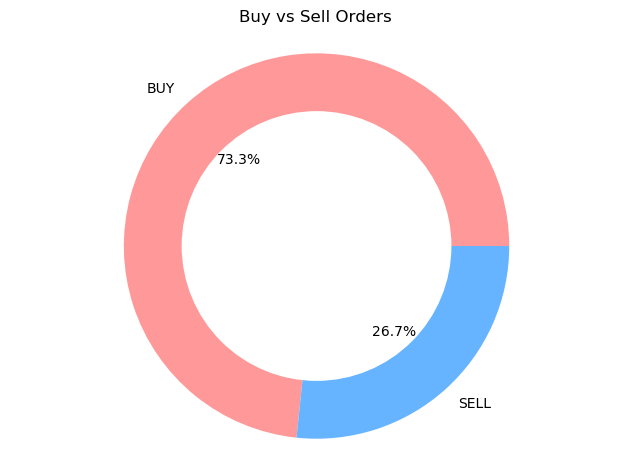

In [28]:
order_counts = macd_data['Order'].value_counts()

# Creating the pie chart
fig, ax = plt.subplots()

ax.pie(order_counts, labels = order_counts.index, autopct='%1.1f%%',
       colors=['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0','#ffb3e6'])

# Draw a circle at the center (this is for making it a donut chart)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle.
ax.axis('equal')  

plt.title('Buy vs Sell Orders')
plt.tight_layout()
plt.show()

In the analysis, it is evident that there is a notable imbalance between the number of buys and sells. To address this discrepancy, I will segregate them, as buys and sells have slight variations in their processing, which may cause confusion for the model when making inferences.

In [29]:
macd_sells = macd_data[macd_data['Order'] == 'SELL']
macd_buys = macd_data[macd_data['Order'] == 'BUY']

In [30]:

us30_data = pd.read_csv('/content/drive/MyDrive/file.csv')
#flip data so that we can go by time

us30_data = us30_data.iloc[::-1].reset_index()
us30_data = us30_data.drop('index', axis = 1)

us30_data['200_EMA'] = us30_data['Last'].ewm(span=200, adjust=False).mean()
us30_data.describe()

,Open,High,Low,Last,Change,Volume,200_EMA
count,149333.000000,149333.000000,149333.000000,149333.000000,149333.000000,1.493330e+05,149333.000000
mean,26238.988747,26252.213311,26225.603104,26239.006851,0.103376,3.685441e+06,26228.587180
std,5579.442101,5582.587937,5576.117095,5579.415650,32.911242,6.649631e+06,5576.591825
min,15464.970000,15471.440000,15450.560000,15464.900000,-2250.460000,0.000000e+00,15793.006835
25%,21815.660000,21825.640000,21806.600000,21815.250000,-7.830000,1.722201e+06,21815.681169
50%,25904.940000,25916.540000,25891.990000,25904.550000,0.000000,2.615862e+06,25910.012643
75%,30895.440000,30916.070000,30874.920000,30896.340000,8.230000,3.855830e+06,30910.314944
max,36947.890000,36952.650000,36934.630000,36947.650000,1480.810000,5.693783e+08,36752.325894


In [31]:

def feature_engineering_us30(data):

    exp12     = data['Last'].ewm(span=12, adjust=False).mean()
    exp26     = data['Last'].ewm(span=26, adjust=False).mean()
    macd_line = exp12 - exp26
    signal_line = macd_line.ewm(span=9, adjust=False).mean()

    data['MACD Line'] = macd_line
    data['Signal Line'] = signal_line    
    return data

In [32]:
feature_data = feature_engineering_us30(us30_data)
feature_data.rename(columns={'Time':'Date'}, inplace=True)
feature_data.head()

,Date,Open,High,Low,Last,Change,%Chg,Volume,200_EMA,MACD Line,Signal Line
0,11/17/2015 09:30,17486.99,17523.64,17486.99,17503.73,20.72,+0.12%,6745474,17503.730000,0.000000,0.000000
1,11/17/2015 09:35,17501.59,17510.94,17476.07,17480.54,-23.19,-0.13%,2175392,17503.499254,-1.849915,-0.369983
2,11/17/2015 09:40,17480.31,17487.96,17466.98,17481.08,0.54,0.00%,2122478,17503.276177,-3.235119,-0.943010
3,11/17/2015 09:45,17480.61,17483.01,17462.98,17468.85,-12.23,-0.07%,2320527,17502.933628,-5.259139,-1.806236
4,11/17/2015 09:50,17468.92,17480.28,17453.62,17473.63,4.78,+0.03%,2042108,17502.642049,-6.403665,-2.725722


In [33]:
# Merge the dataframes

# Convert 'Date' column to datetime
macd_sells['Date'] = pd.to_datetime(macd_sells['Date'])
macd_buys['Date'] = pd.to_datetime(macd_buys['Date'])
feature_data['Date'] = pd.to_datetime(feature_data['Date'])

# Reset index
macd_sells = macd_sells.reset_index()
macd_buys = macd_buys.reset_index()

# Merge dataframes on 'Date' column
macd_sells = pd.merge(macd_sells, feature_data, on='Date')
macd_buys = pd.merge(macd_buys, feature_data, on='Date')

# Print the shape of the merged dataframes
print(f"Macd_buys shape: {macd_buys.shape}")
print(f"Macd_sells shape: {macd_sells.shape}")

Macd_buys shape: (762, 24)
Macd_sells shape: (277, 24)


In [34]:

dropping = ['200_EMA', 'Unnamed: 12', 'Open', 'High', 'Low', 'Last', 'index', 'Unnamed: 0','Challenge Profit', 'Challenge Profit', 'Entry', 'Amount', 'Profit', 'Change', '%Chg',  'Take Profit', 'Stop Loss', 'Order', 'EMA', 'Date']

# Calculate distance from EMA
macd_sells['distance_ema'] = abs(macd_sells['Low'] - macd_sells['EMA'])
macd_buys['distance_ema'] = abs(macd_buys['Low'] - macd_buys['EMA'])

# Extract hour and minute from Date
macd_sells['hour'] = macd_sells['Date'].dt.hour
macd_buys['hour'] = macd_buys['Date'].dt.hour
macd_sells['minute'] = macd_sells['Date'].dt.minute
macd_buys['minute'] = macd_buys['Date'].dt.minute

# Drop unnecessary columns
macd_sells = macd_sells.drop(columns=dropping)
macd_buys = macd_buys.drop(columns=dropping)

print(macd_buys.columns)

Index(['Outcome', 'Points', 'Volume', 'MACD Line', 'Signal Line',
       'distance_ema', 'hour', 'minute'],
      dtype='object')


Now that we have the features lets take a look at them. I'm going to start with the buys sections of EDA.

In [35]:
macd_buys.describe()

,Points,Volume,MACD Line,Signal Line,distance_ema,hour,minute
count,762.000000,7.620000e+02,762.000000,762.000000,762.000000,762.000000,762.000000
mean,55.416325,2.601285e+06,-12.480694,-13.553703,65.941876,11.834646,26.712598
std,47.074728,1.431720e+06,13.209748,14.095120,72.925130,1.565548,17.066002
min,5.060000,0.000000e+00,-131.284593,-136.472422,0.125810,10.000000,0.000000
25%,25.087500,1.756002e+06,-15.740224,-17.850802,15.866293,10.000000,15.000000
50%,42.410000,2.514400e+06,-8.035711,-8.799290,40.304150,12.000000,25.000000
75%,70.747500,3.286486e+06,-4.027611,-4.540245,95.784813,13.000000,40.000000
max,532.900000,9.524927e+06,4.566609,1.351154,725.587460,15.000000,55.000000


Lets see if there are any missing values.

In [36]:
macd_buys.isnull().sum()

Outcome         0
Points          0
Volume          0
MACD Line       0
Signal Line     0
distance_ema    0
hour            0
minute          0
dtype: int64

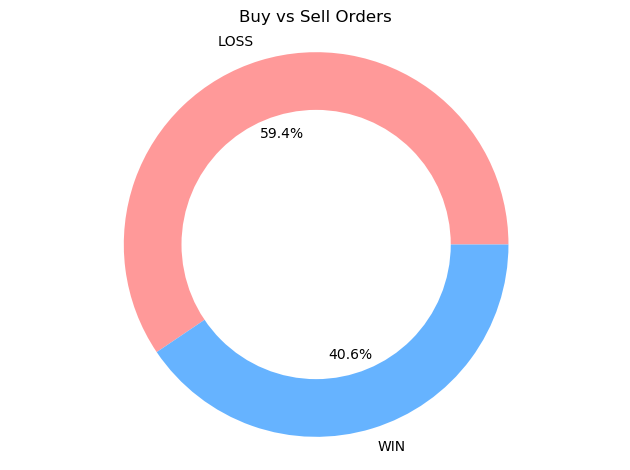

In [37]:
#checking to see if there is any imbalances in the buys.

order_counts = macd_buys['Outcome'].value_counts()

# Creating the pie chart
fig, ax = plt.subplots()

ax.pie(order_counts, labels = order_counts.index, autopct='%1.1f%%',
       colors=['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0','#ffb3e6'])

# Draw a circle at the center (this is for making it a donut chart)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle.
ax.axis('equal')  

plt.title('Buy vs Sell Orders')
plt.tight_layout()
plt.show()

Looks like there is a slight imbalance in the dataset, we will have to take that into consideration when we are training a model.

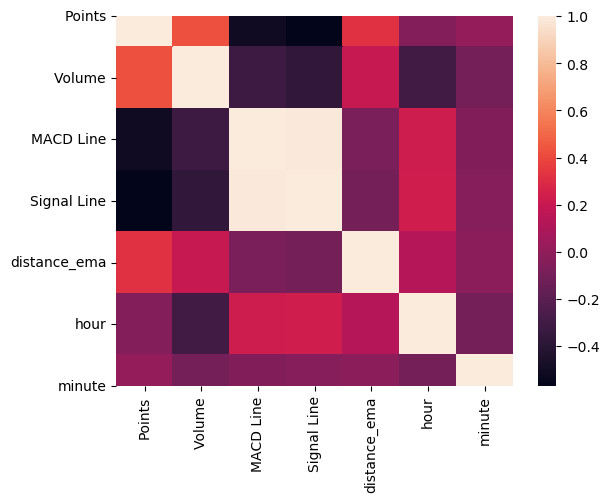

In [38]:
# taking a look to see if there are any correlated variables

correlations = macd_buys.corr()
sns.heatmap(correlations)

Keeping note that it seems that volume and points are slightly correlated as well as points and distance from the exponential moving average

 Pair plots are a great method to identify trends for follow-up analysis. It is used to visualize the distribution of a single variable or the relationship between two variables separately within subsets of your dataset.

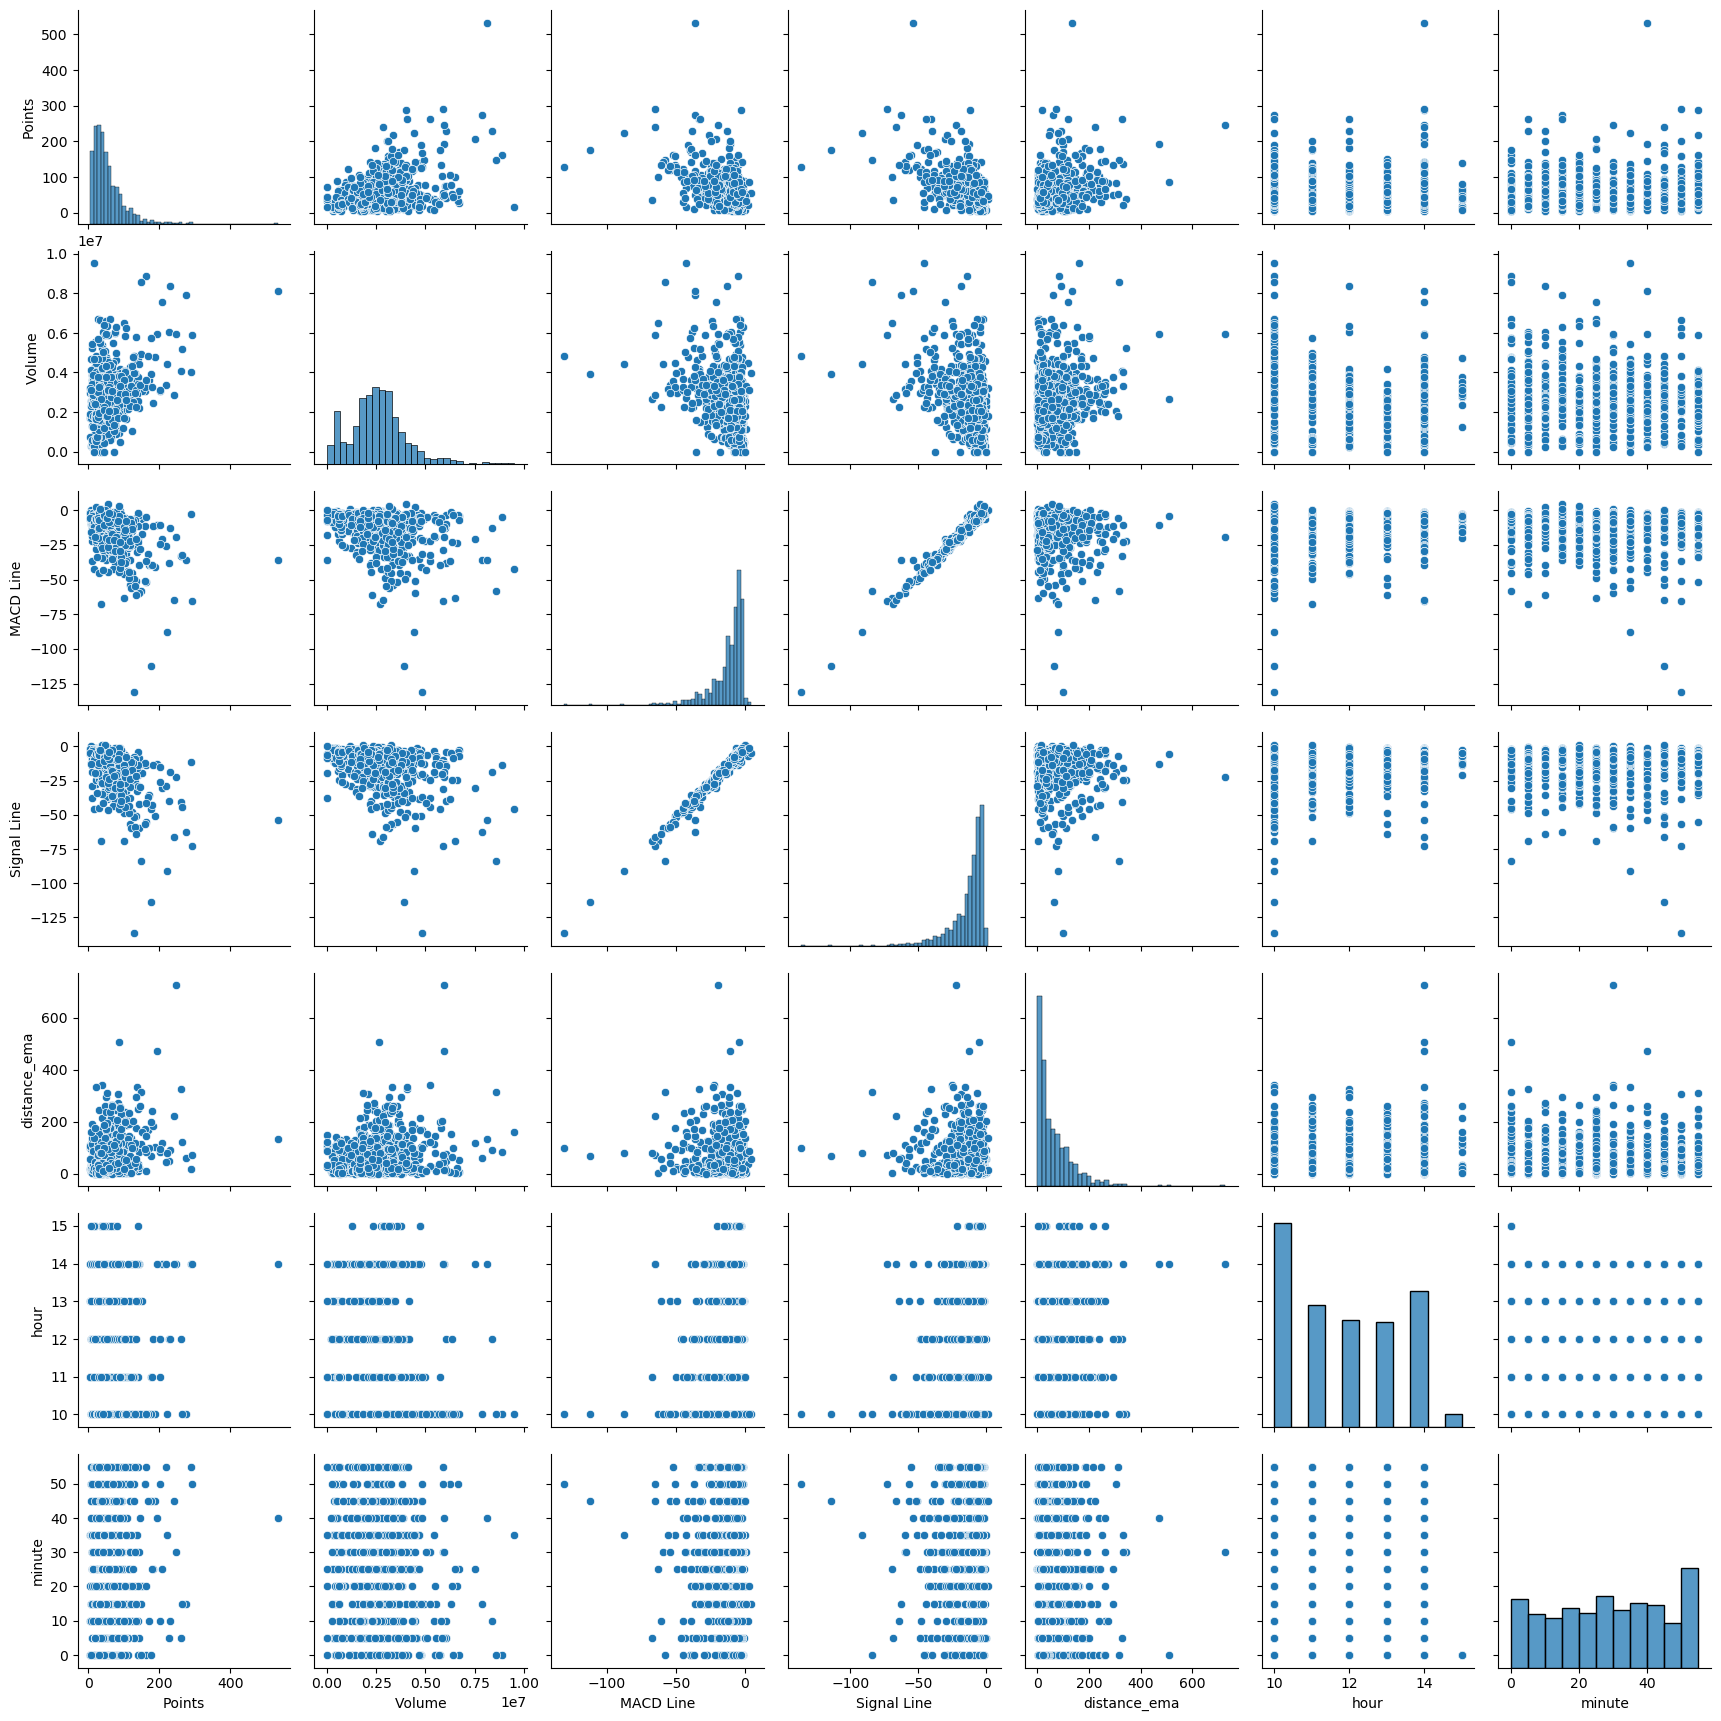

In [39]:
# lets get some scatter plot visualizations

sns.pairplot(macd_buys)


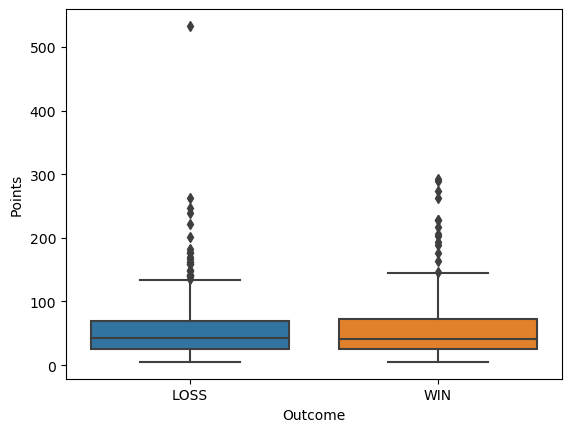

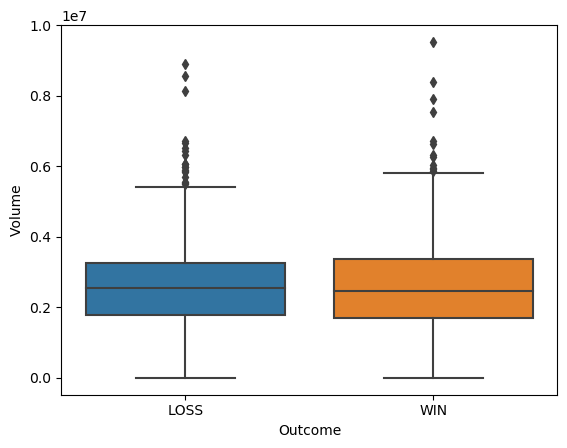

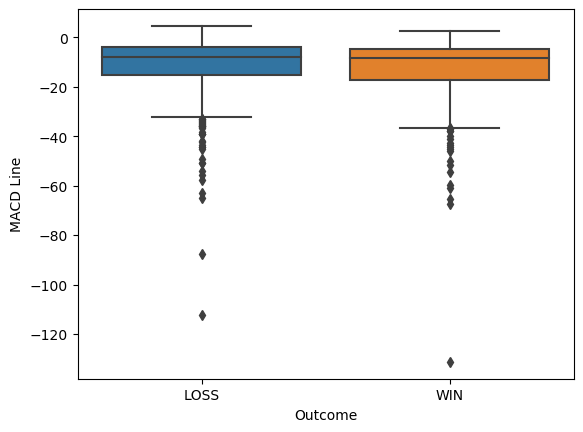

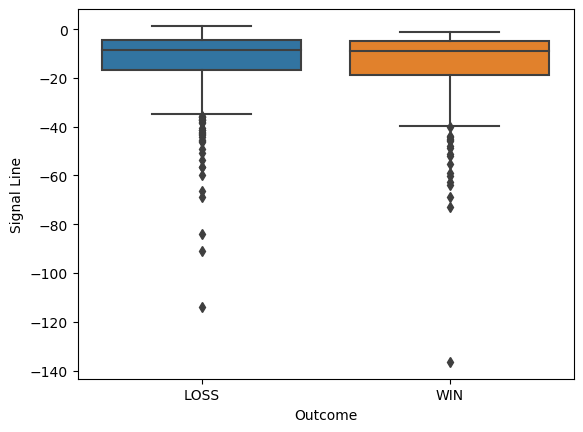

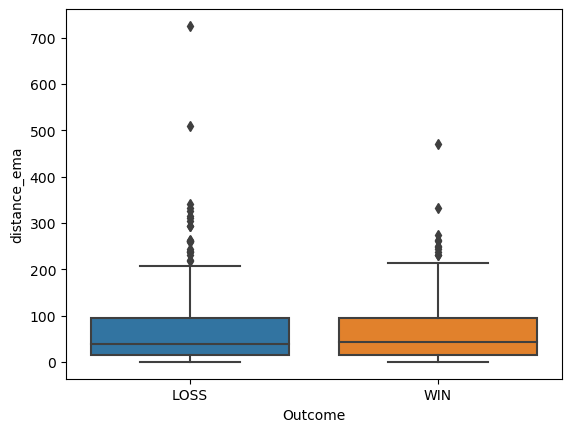

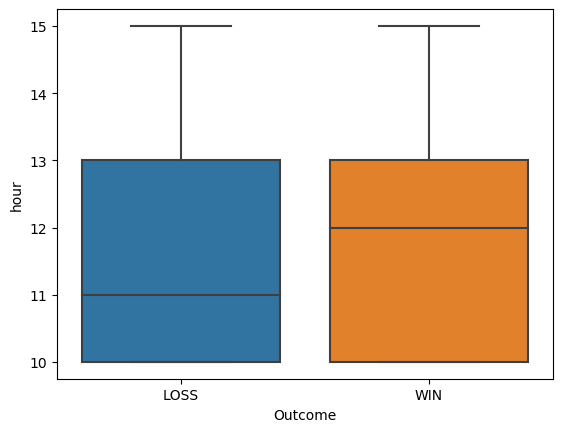

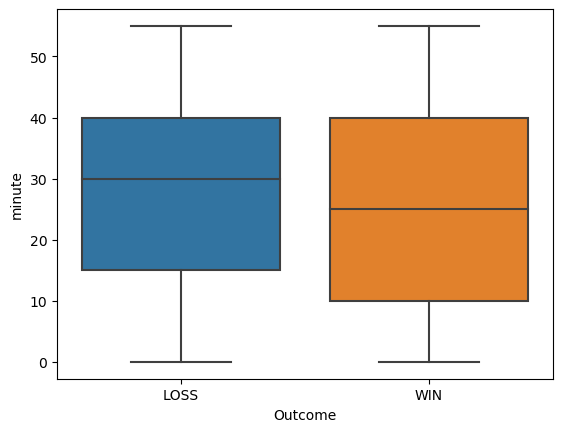

In [40]:
# Trying to see how they are reacting to target variable in each one

FEATURES = ['Points', 'Volume', 'MACD Line', 'Signal Line',
       'distance_ema', 'hour', 'minute']
for feature in FEATURES:
    sns.boxplot(x='Outcome', y=feature, data=macd_buys)
    plt.show()

Based on the target there doesn't seem to be any true signal or obvious signal or differences between wins and losses with these features. This tells me that we will need to look into more features as we go. 

The t-test has an assumption that the data are normally distributed within each group. However, normalization (or standardization, which is often what people mean when they refer to normalization) is not strictly necessary for a t-test. Normalization changes the scale of your data, but does not make it normally distributed unless it was already normal to begin with.

If your data are not normally distributed, you might consider transforming your data to achieve a normal distribution, such as taking the log, square root, or another appropriate transformation. This is sometimes done in order to meet the assumptions of statistical tests or machine learning models that assume normally distributed data.

However, even without normal distribution, you can use non-parametric statistical tests that do not assume a normal distribution. For example, the Mann-Whitney U test is a non-parametric test that you could use instead of a t-test when you cannot assume your data are normally distributed.

I chose a significance level of 0.05 to see if there is any suggestion that the feature may be relevant for my target variable. 

In [41]:
from scipy.stats import mannwhitneyu

for col in FEATURES:
    # separate the two groups
    group1 = macd_buys[macd_buys['Outcome'] == 'WIN'][col]
    group2 = macd_buys[macd_buys['Outcome'] == 'LOSS'][col]

    # Perform Mann-Whitney U test
    u_statistic, p = mannwhitneyu(group1, group2)

    print(f"{col} - p-value of Mann-Whitney U test: {p}")    



Points - p-value of Mann-Whitney U test: 0.8869824381651025
Volume - p-value of Mann-Whitney U test: 0.8215221785219121
MACD Line - p-value of Mann-Whitney U test: 0.22677040586242425
Signal Line - p-value of Mann-Whitney U test: 0.2579332247558459
distance_ema - p-value of Mann-Whitney U test: 0.5213721573970321
hour - p-value of Mann-Whitney U test: 0.1478005550237887
minute - p-value of Mann-Whitney U test: 0.1990457681605503


# Shifting Our Focus: Expanding Feature Selection
Upon careful examination of our existing feature set, it has become clear that none of the features passed our test for a significance level under 0.05. This insight suggests that it's time to pivot our approach and explore a broader range of features.

In the upcoming steps, we will design a new feature engineering function. This enhanced function will embrace a larger, more diverse feature set, allowing us to conduct more exhaustive tests. We will initially focus on visual inspection using box plots to compare feature distributions across wins and losses.

For the time being, we will remove the 'points', 'volume', 'macd', 'signal', 'distance', 'hour', and 'minute' features from our scope and concentrate on the introduction of new ones.

Here is a list of features we will be examining and their associated meanings:

1. **is_bullish:** This feature denotes a green candlestick, indicating a closing price higher than the opening price.

2. **is_bearish:** This feature identifies a red candlestick, signifying a closing price lower than the opening price.

3. **candle_size:** Represents the size in points of a candlestick.

4. **body_wick_ratio:** This ratio showcases the size of the candlestick's body relative to its wick.

5. **ATR (Average True Range):** A market volatility indicator.

6. **RSI (Relative Strength Index):** A momentum indicator that measures the speed and magnitude of a security's recent price changes to evaluate overbought or oversold conditions.

7. **MACD_Hist:** The difference between the MACD (Moving Average Convergence Divergence) line and the signal line.

8. **Price Rate of Change (ROC):** A momentum-based technical indicator that measures the percentage change in price between the current price and the price a certain number of periods ago.

9. **HL:** The difference between the High and the Low price for each period, representing the price range (or volatility) within the period.

10. **absHC and absLC:** These represent the absolute difference between the High (or Low) price of the current period and the Last (close) price of the previous period.

11. **TR (True Range):** A measure of volatility, representing the greatest of the following: current high less the current low; the absolute value of the current high less the previous close; and the absolute value of the current low less the previous close.

12. **Upper_Band and Lower_Band:** These features form part of the Bollinger Bands, which are volatility bands placed above and below a moving average.

13. **Log Returns:** This is the logarithmic return, representing the difference in the natural logarithm of the closing prices between periods.

14. **Historical Volatility:** This measures the standard deviation of the logarithmic returns, providing a common measure of price volatility.

15. **Momentum:** This is the rate of acceleration of a security's price or volume - in other words, the speed at which the price is changing.

16. **Distances from Exponential Moving Averages (EMA):** Unlike Simple Moving Averages (SMA), EMAs place a greater weight on recent data points. EMAs could better capture recent trends in data.

17. **Stochastic Oscillator %K and %D:** These two lines are used to check if a security’s price is closing near the high or the low of its recent price range. This provides a sense of when a security is overbought or oversold.

18. **Return on Investment (ROI):** This measure can help understand the gain or loss made on the security relative to the amount of money invested.

I believe these selected features will provide a comprehensive view of the market conditions and dynamics that our model needs to learn. Let's dive in and explore these features further.

In [42]:
#Run this once so that you can pip install ta-lib

!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr
!make
!make install
%cd ..


--2023-05-29 19:29:59--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 204.68.111.105
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|204.68.111.105|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2023-05-29 19:29:59--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 204.68.111.105
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: http://deac-riga.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2023-05-29 19:30:00--  http://deac-riga.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving deac-riga.d

In [43]:
!pip install TA-Lib
!pip install --upgrade numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [53]:
import talib

def feature_engineering_new(data):
    def body_wick_ratio(row):
        if row['is_bullish']:
            if abs(row['Open'] - row['Low']) != 0:
                row['body_wick_ratio'] = abs(row['Last'] - row['Open']) / abs(row['Open'] - row['Low'])
            else:
                row['body_wick_ratio'] = 0
        else:
            if abs(row['Last'] - row['Low']) != 0:
                row['body_wick_ratio'] = abs(row['Last'] - row['Open']) / abs(row['Last'] - row['Low'])
            else:
                row['body_wick_ratio'] = 0
        return row['body_wick_ratio']
       
    data['is_bullish'] = (data['Last'] > data['Open']).astype(int)
    data['is_bearish'] = (data['Last'] < data['Last'].shift(1)).astype(int)
    data['candle_size'] = abs(data['Last'] - data['Open'])
    data['body_wick_ratio'] = data.apply(body_wick_ratio, axis=1)
    
    ema_20 = talib.EMA(data['Last'], timeperiod=20)
    ema_50 = talib.EMA(data['Last'], timeperiod=50)
    ema_200 = talib.EMA(data['Last'], timeperiod=200)

    data['dist_from_EMA_20'] = abs(data['Last'] - (ema_20))
    data['dist_from_EMA_50'] = abs(data['Last'] - (ema_50))
    data['dist_from_EMA_200'] = abs(data['Last'] - (ema_200))

    data['ema_stacked'] = (ema_20 > ema_50) & (ema_50 > ema_200)

    data['Momentum_3'] = data['Last'] - data['Last'].shift(3)
    data['Momentum_5'] = data['Last'] - data['Last'].shift(5)   

    data['Stochastic_%K'], data['Stochastic_%D'] = talib.STOCH(data['High'], data['Low'], data['Last'], fastk_period=14, slowk_period=3, slowd_period=3)

    data['ATR'] = talib.ATR(data['High'], data['Low'], data['Last'], timeperiod=14)
    
    data['ROI'] = (data['Last'] - data['Last'].shift(1)) / data['Last'].shift(1)

    # 3. Relative Strength Index (RSI)
    data['RSI'] = talib.RSI(data['Last'], timeperiod=14)

    # 5. MACD Histogram
    macd, signal, hist = talib.MACD(data['Last'], fastperiod=12, slowperiod=26, signalperiod=9)
    data['MACD_Hist'] = hist

    # 8. Price Rate of Change (ROC)
    data['ROC'] = talib.ROC(data['Last'], timeperiod=10)

    data['HL'] = data['High'] - data['Low']
    data['absHC'] = abs(data['High'] - data['Last'].shift())
    data['absLC'] = abs(data['Low'] - data['Last'].shift())
    data['TR'] = data[['HL', 'absHC', 'absLC']].max(axis=1)
   
    sma_20 = data['Last'].rolling(window=20).mean()
    sd_20 = data['Last'].rolling(window=20).std()
    data['Upper_Band'] = sma_20 + (sd_20*2)
    data['Lower_Band'] = sma_20 - (sd_20*2)

    data['Log Returns'] = np.log(data['Last']/data['Last'].shift(1))
    data['Historical Volatility'] = data['Log Returns'].rolling(window=21).std() * np.sqrt(252)


    return data

feature_data = feature_engineering_new(us30_data)
feature_data.rename(columns={'Time':'Date'}, inplace=True)
feature_data.head()

,Date,Open,High,Low,Last,Change,%Chg,Volume,200_EMA,MACD Line,...,MACD_Hist,ROC,HL,absHC,absLC,TR,Upper_Band,Lower_Band,Log Returns,Historical Volatility
0,2015-11-17 09:30:00,17486.99,17523.64,17486.99,17503.73,20.72,+0.12%,6745474,17503.730000,0.000000,...,NaN,NaN,36.65,NaN,NaN,36.65,NaN,NaN,NaN,NaN
1,2015-11-17 09:35:00,17501.59,17510.94,17476.07,17480.54,-23.19,-0.13%,2175392,17503.499254,-1.849915,...,NaN,NaN,34.87,7.21,27.66,34.87,NaN,NaN,-0.001326,NaN
2,2015-11-17 09:40:00,17480.31,17487.96,17466.98,17481.08,0.54,0.00%,2122478,17503.276177,-3.235119,...,NaN,NaN,20.98,7.42,13.56,20.98,NaN,NaN,0.000031,NaN
3,2015-11-17 09:45:00,17480.61,17483.01,17462.98,17468.85,-12.23,-0.07%,2320527,17502.933628,-5.259139,...,NaN,NaN,20.03,1.93,18.10,20.03,NaN,NaN,-0.000700,NaN
4,2015-11-17 09:50:00,17468.92,17480.28,17453.62,17473.63,4.78,+0.03%,2042108,17502.642049,-6.403665,...,NaN,NaN,26.66,11.43,15.23,26.66,NaN,NaN,0.000274,NaN


In [54]:
macd_sells = macd_data[macd_data['Order'] == 'SELL']
macd_buys = macd_data[macd_data['Order'] == 'BUY']
macd_sells['Date'] = pd.to_datetime(macd_sells['Date'])
macd_buys['Date'] = pd.to_datetime(macd_buys['Date'])
feature_data['Date'] = pd.to_datetime(feature_data['Date'])
macd_sells = macd_sells.reset_index()
macd_buys = macd_buys.reset_index()

macd_sells = pd.merge(macd_sells, feature_data, on = 'Date')
macd_buys = pd.merge(macd_buys, feature_data, on='Date')

print(f'Macd_buys shape: {macd_buys.shape}')
print(f'Macd_sells shape: {macd_sells.shape}')

dropping = ['200_EMA', 'Unnamed: 12', 'Open', 'High', 'Low', 'Last', 'index', 'Unnamed: 0','Challenge Profit', 'Challenge Profit', 'Entry', 'Amount', 'Profit', 'Change', '%Chg',  'Take Profit', 'Stop Loss', 'Order', 'EMA', 'Date']

macd_sells['distance_ema'] = abs(macd_sells['Low'] - macd_sells['EMA'])
macd_buys['distance_ema'] = abs(macd_buys['Low'] - macd_buys['EMA'])
macd_sells['hour'] = macd_sells['Date'].dt.hour
macd_buys['hour'] = macd_buys['Date'].dt.hour
macd_sells['minute'] = macd_sells['Date'].dt.minute
macd_buys['minute'] = macd_buys['Date'].dt.minute

macd_sells = macd_sells.drop(columns=dropping, axis = 1)
macd_buys = macd_buys.drop(columns=dropping, axis=1)

print(macd_buys.columns)

Macd_buys shape: (762, 49)
Macd_sells shape: (277, 49)
Index(['Outcome', 'Points', 'Volume', 'MACD Line', 'Signal Line', 'is_bullish',
       'is_bearish', 'candle_size', 'body_wick_ratio', 'dist_from_EMA_20',
       'dist_from_EMA_50', 'dist_from_EMA_200', 'ema_stacked', 'Momentum_3',
       'Momentum_5', 'Stochastic_%K', 'Stochastic_%D', 'ATR', 'ROI', 'RSI',
       'MACD_Hist', 'ROC', 'HL', 'absHC', 'absLC', 'TR', 'Upper_Band',
       'Lower_Band', 'Log Returns', 'Historical Volatility', 'distance_ema',
       'hour', 'minute'],
      dtype='object')


In [55]:
macd_buys['ema_stacked'].value_counts()

False    587
True     175
Name: ema_stacked, dtype: int64

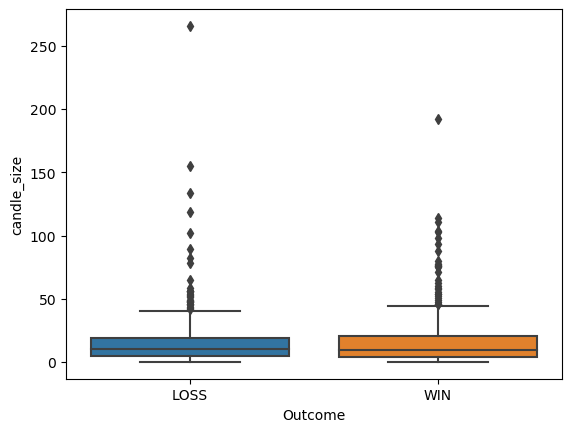

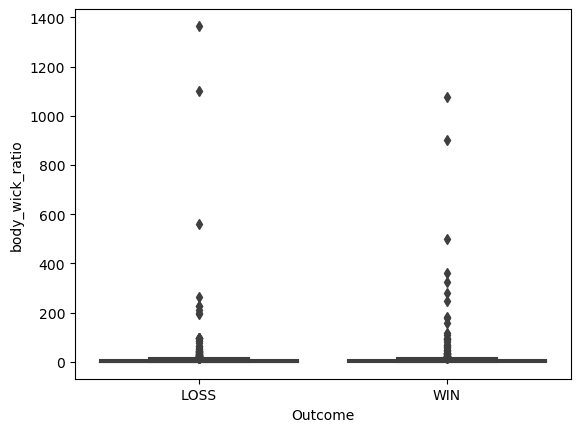

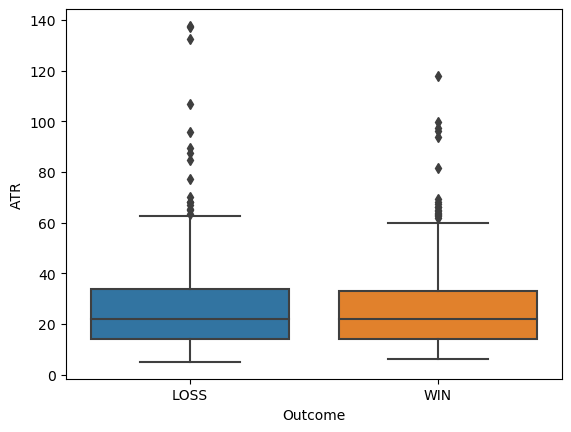

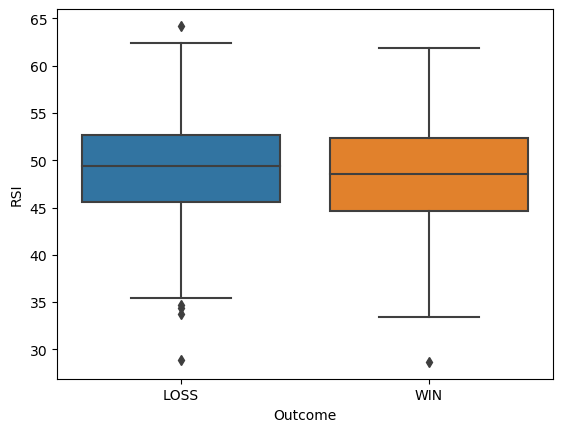

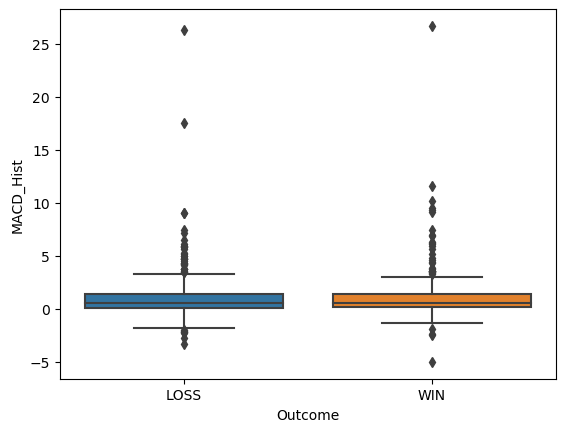

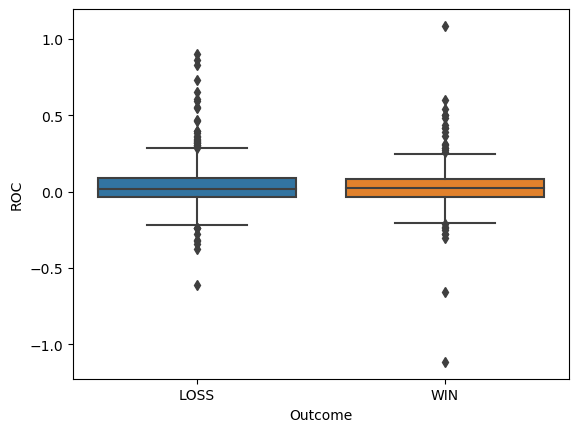

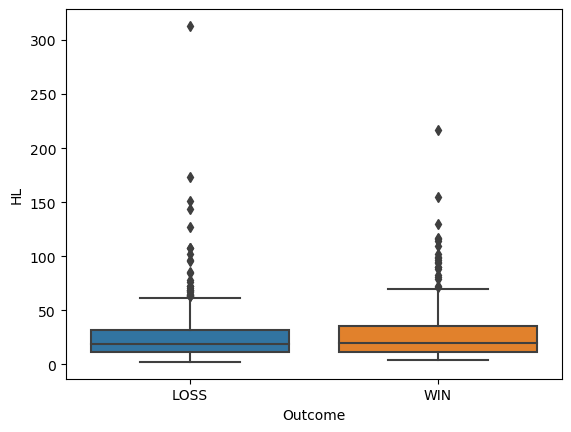

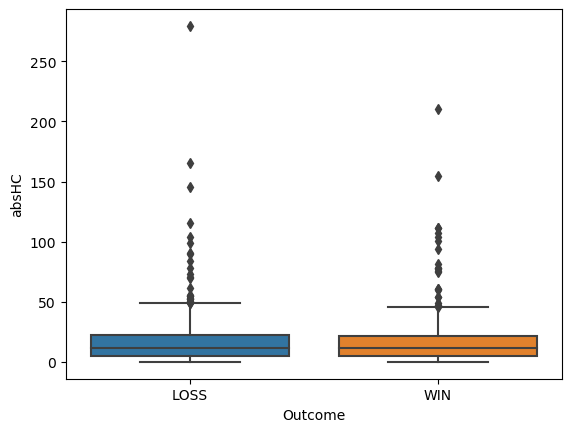

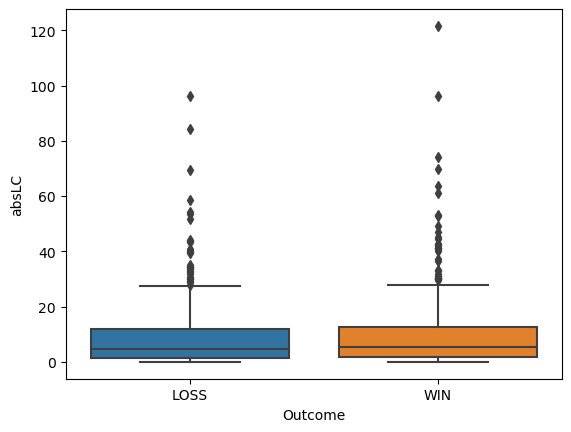

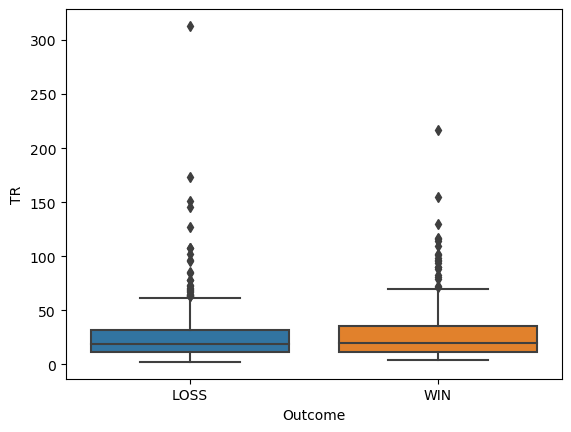

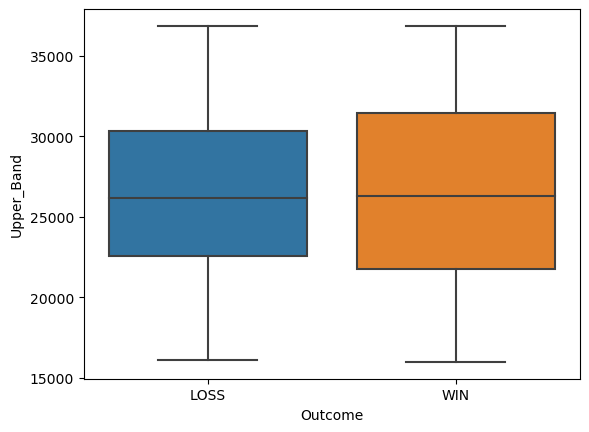

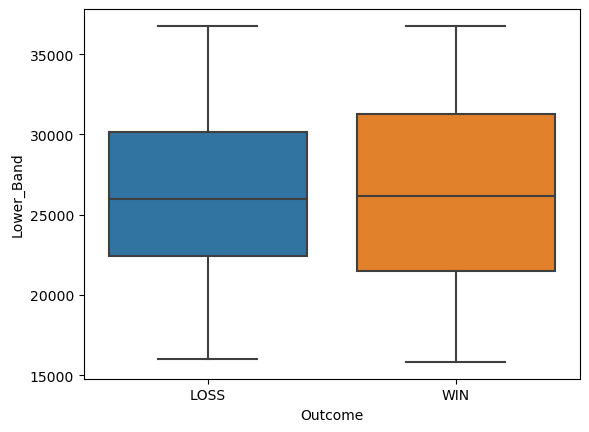

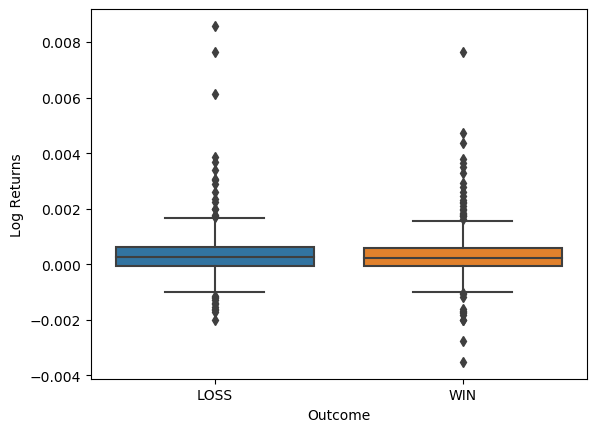

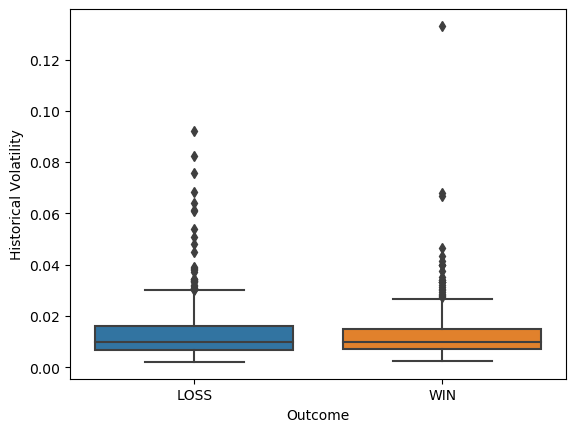

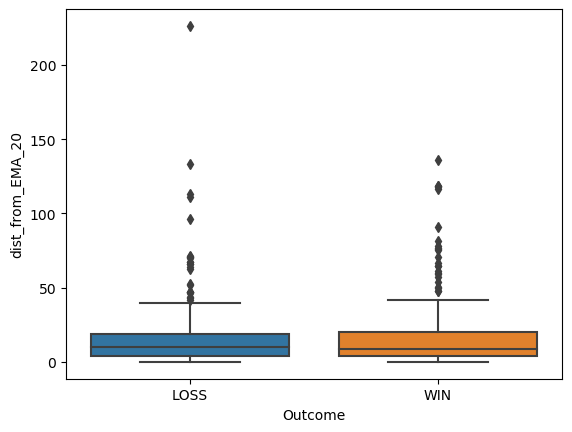

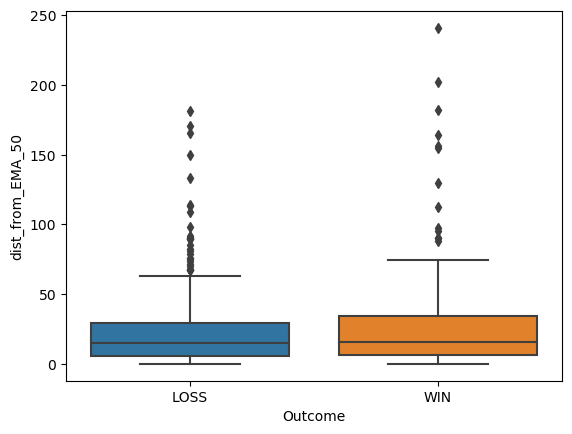

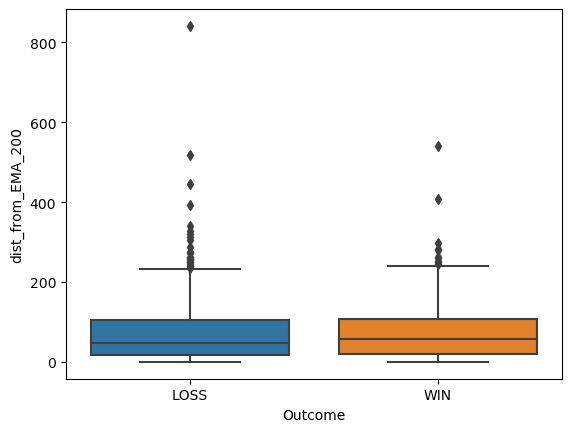

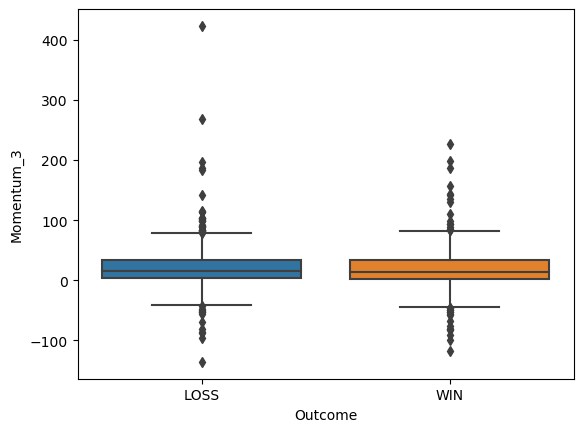

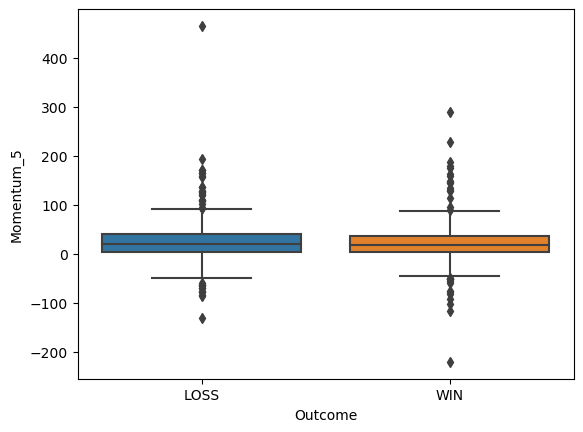

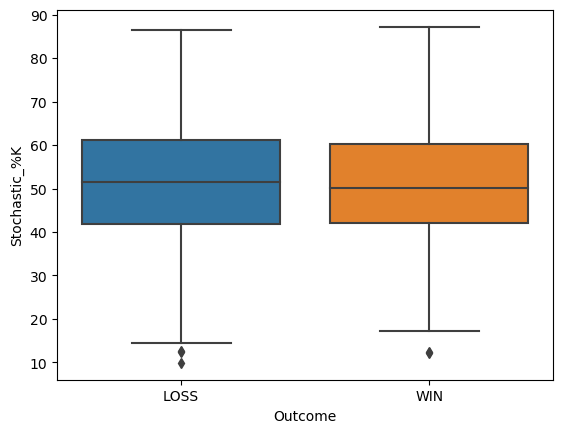

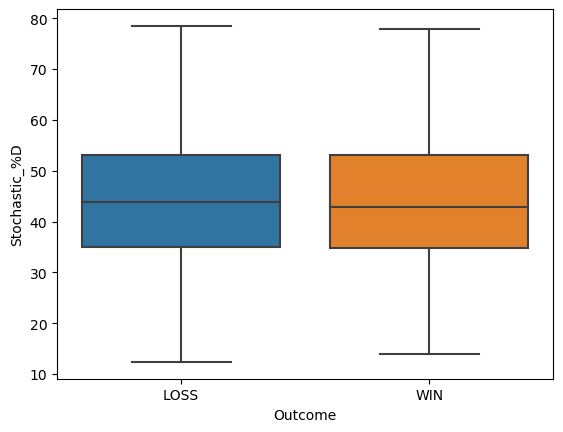

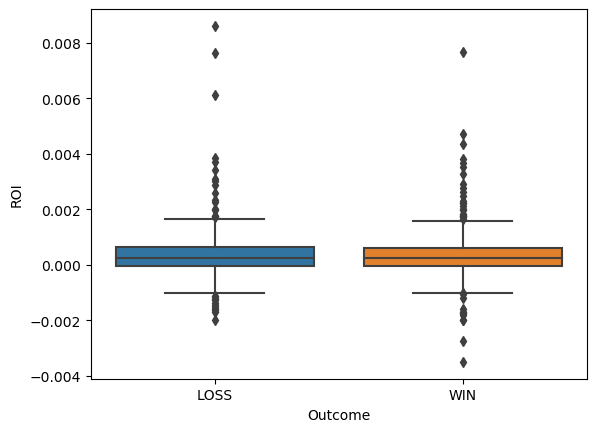

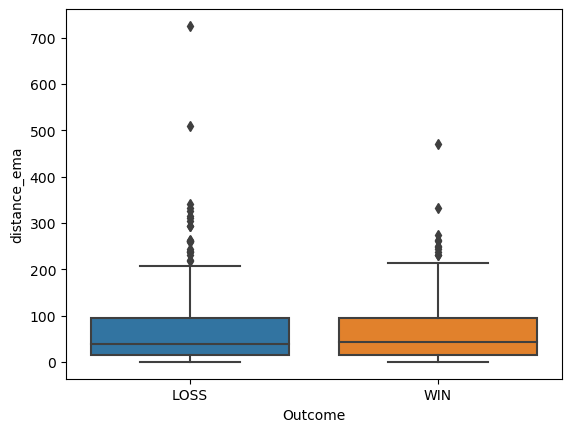

In [56]:
FEATURES = ['candle_size', 'body_wick_ratio', 'ATR', 'RSI',
       'MACD_Hist', 'ROC', 'HL', 'absHC', 'absLC', 'TR', 'Upper_Band',
       'Lower_Band', 'Log Returns', 'Historical Volatility',
       'dist_from_EMA_20', 'dist_from_EMA_50', 'dist_from_EMA_200',
       'Momentum_3', 'Momentum_5', 'Stochastic_%K', 'Stochastic_%D', 'ROI',
       'distance_ema']
for feature in FEATURES:
    sns.boxplot(x='Outcome', y=feature, data=macd_buys)
    plt.show()

Unfortunately, the initial exploratory analysis did not yield clear relationships between our feature variables and the target outcome - wins or losses. This makes our task more complex than initially anticipated.

However, it's important to remember that not all influential relationships in a dataset are easily visible in simple visualizations. There may be hidden patterns that our basic EDA methods haven't uncovered.

As a next step, I will implement an XGBoost model and plot the feature importance. XGBoost, an ensemble tree method, is known for its efficiency and effectiveness, and it might help us reveal underlying patterns in the feature contributions towards predicting the target. Let's hope we can find some insights from this...


In [57]:
map_target = {'WIN' : 1, 'LOSS' : 0}
macd_buys['Outcome'] = macd_buys['Outcome'].map(map_target)
X = macd_buys.drop('Outcome', axis=1)
y = macd_buys['Outcome']

Accuracy: 50.33%


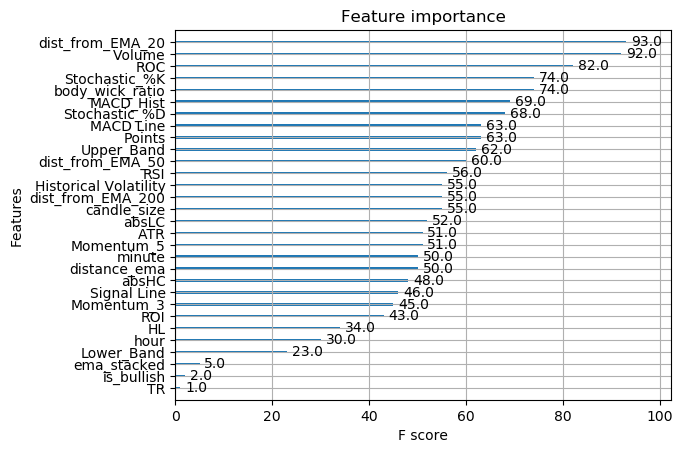

In [61]:
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fitting the model
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

# Make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

# Evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

# Plot feature importance
plot_importance(model)
plt.show()


Based on the feature importances I can make a few general observations:

1. **dist_from_ema_20** is the most important feature: It is the feature that appears most frequently in the trees of the model (104 times). The EMA, or Exponential Moving Average, is a type of moving average that places more weight on recent data points. dist_from_ema_20 (the distance from the 20-day EMA) being important suggests that recent price trends are particularly influential in predicting your target variable.

2. **Volume and ROC** are also notably important: Volume is a common feature in financial models, often indicating the level of interest or activity in a particular security. The Rate of Change (ROC) is a momentum-based indicator, showing the percentage change between the current price and the price a certain number of periods ago.

3. **Historical Volatility and stochastic % k** have significant importance too: The importance of Historical Volatility implies that the magnitude of price changes also has a role in the model's decisions. The stochastic oscillator (%K) is a momentum indicator comparing a particular closing price of a security to a range of its prices over a certain period of time. Its importance indicates that the position of the closing price relative to recent price range is valuable information.

4. **TR (True Range) and lower_band (Lower Bollinger Band)** have the lowest feature importance: This could suggest that these features do not contribute much to the decision-making process of the model, or they could be conveying similar information as some of the other, more important features.

Feature importance does not necessarily imply causality or a predictive relationship. It only indicates how often a feature is used to split the data across all trees. To truly understand the predictive power and relationships of these features, further analysis would be necessary, such as investigating Accumulated Local Effects (ALE) plots.